In [1]:
import requests

In [2]:
#Block 63640
url='https://blockchain.info/rawblock/0000000009d7aeecc18823aebcc3182a006cf448ea2ba9c47c549cebd374cbca'

#Block 63520, raw address using prev output address
url2 = 'https://blockchain.info/rawaddr/1DEWvNeaFSjD89UQiyEQvvnQMqtDbU8Aur'

In [3]:
response=requests.get(url)
block=response.json()

r=requests.get(url2)
try:
    raw_add = r.json()
except ValueError:
    print("Response content is not valid JSON")

In [4]:
block['tx'][1]

{'block_height': 63640,
 'block_index': 63640,
 'double_spend': False,
 'fee': 0,
 'hash': 'a8aae4cafaabd1b3b59b76ad42cfc8ea7f6b440b64a7e3b79183f8012cb50e8b',
 'inputs': [{'index': 0,
   'prev_out': {'addr': '1DEWvNeaFSjD89UQiyEQvvnQMqtDbU8Aur',
    'n': 0,
    'script': '76a914862fe49f67e6d8ad74b328d92221f9bd65624ee688ac',
    'spending_outpoints': [{'n': 0, 'tx_index': 4892649131622160}],
    'spent': True,
    'tx_index': 5914874697192359,
    'type': 0,
    'value': 330500000000},
   'script': '493046022100c86cf6fbeef839f11ee01d323ed680d0889a42ee4a19a241bbc58461e86ada8a022100d2f9b8a887d251c84dd7b4af5fb82706e11e1af0421b8362d4b354e42fc21d01014104613420f263d2962461ac62452e801177919da60f31363a25f12ef5344539fc5388a1c28d4fff33574fbf62eba0dee9faed8d45b224ba169a091fa499be2143f1',
   'sequence': 4294967295,
   'witness': ''}],
 'lock_time': 0,
 'out': [{'addr': '1KG11SDkwEF7z54shpPEYLQK5h41Hm3D4X',
   'n': 0,
   'script': '76a914c8488281cbc237c09e9048e1b56d027e26b925e688ac',
   'spending_ou

In [5]:
in_add = block['tx'][1]['inputs'][0]['prev_out']['addr']

out_add=[]
for i in range(len(block['tx'][1]['out'])):
    out_add.append(block['tx'][1]['out'][i]['addr'])

prev_add=[]
for i in range(len(raw_add['txs'][1]['inputs'])):
    prev_add.append(raw_add['txs'][1]['inputs'][i]['prev_out']['addr'])

In [6]:
edges=[]

for i in range(len(prev_add)):
    edges.append((prev_add[i],in_add))

for i in range(len(out_add)):
    edges.append((in_add,out_add[i]))

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
g = nx.MultiDiGraph()
g.add_edges_from(edges)

In [8]:
import numpy as np

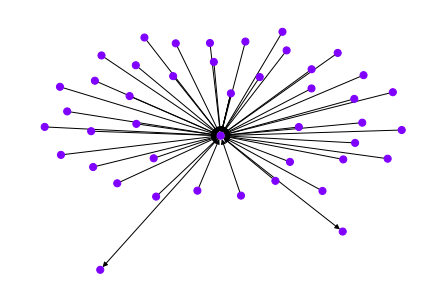

In [9]:
pos = nx.spring_layout(g, k=1/(len(edges)**(1/2)), iterations=20)
nx.draw(g,pos=pos, node_size=50, node_color=np.ones(44), cmap=plt.cm.rainbow)